In [ ]:
# Домашнее задание № 4

In [610]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [611]:
# загружаю данные
data = pd.read_csv('athletes.csv')

In [612]:
# смотрим, что тут есть
print (data.shape)
data.head()

(11538, 11)


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [613]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [614]:
# проверим на пропуски данных
print (data[data.isna().any(axis=1)])

              id                                 name nationality     sex  \
12     258556239                           Abbas Qali         IOA    male   
28     349871091                 Abdelhafid Benchabla         ALG    male   
30      23564778                     Abdelkader Chadi         ALG    male   
37     934545704  Abdelrahman Salah Orabi Abdelgawwad         EGY    male   
47     469953606                   Abdoullah Bamoussa         ITA    male   
...          ...                                  ...         ...     ...   
11465  980866226                  Zhaina Shekerbekova         KAZ  female   
11468  405483135                 Zhanibek Alimkhanuly         KAZ    male   
11513  352983859                        Zohir Kedache         ALG    male   
11514  424586991                    Zohra Ez Zahraoui         MAR  female   
11517  495365659                   Zoltan Adam Harcsa         HUN    male   

            dob  height  weight      sport  gold  silver  bronze  
12     1

In [ ]:
# итого имеем [680 rows x 11 columns]

In [615]:
# удалим строки с NaN
data = data.dropna()
data

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [616]:
# проверим еще раз)
print (data[data.isna().any(axis=1)])

Empty DataFrame
Columns: [id, name, nationality, sex, dob, height, weight, sport, gold, silver, bronze]
Index: []


In [ ]:
# база данных очищена

In [617]:
# итого у нас осталось
data.shape

(10858, 11)

In [ ]:
# скопируем базу данных и будем с ней работать

In [618]:
data_copy = data.copy(deep=True)
data_copy

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [619]:
# для полной касоты переиндексируем
data_copy = data_copy.reset_index(drop=True)
data_copy

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10853,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
10854,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
10855,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
10856,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


In [ ]:
# так как конкретного указания на классификацию нет то будем классифицировать по критерию - sex

In [620]:
# далее удаляем
# id - показатель уникален
# name - считаю, что эти параметры уникальны
# nationality - от этого пол точно не зависит
# dob - и от дат тоже
data_copy = data_copy.drop(columns=['id', 'name', 'nationality', 'dob'], axis=0)
data_copy

,sex,height,weight,sport,gold,silver,bronze
0,male,1.72,64.0,athletics,0,0,0
1,female,1.68,56.0,fencing,0,0,0
2,male,1.98,79.0,athletics,0,0,1
3,male,1.83,80.0,taekwondo,0,0,0
4,male,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...
10853,female,1.64,58.0,athletics,0,0,0
10854,female,1.73,63.0,athletics,0,0,0
10855,male,1.85,100.0,wrestling,0,0,0
10856,male,1.60,56.0,weightlifting,0,0,0


In [621]:
# создадим еще одну базу данных
data_h_w = data_copy.drop(columns=['sex', 'sport', 'gold', 'silver', 'bronze'], axis=1)

In [622]:
data_h_w.head()     # потом пригодится)

,height,weight
0,1.72,64.0
1,1.68,56.0
2,1.98,79.0
3,1.83,80.0
4,1.81,71.0


In [623]:
# заменим целевой параметр на 0 и 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [624]:
le.fit(data_copy['sex'])

LabelEncoder()

In [625]:
data_copy['sex'] = le.fit_transform(data_copy['sex'])
data_copy

,sex,height,weight,sport,gold,silver,bronze
0,1,1.72,64.0,athletics,0,0,0
1,0,1.68,56.0,fencing,0,0,0
2,1,1.98,79.0,athletics,0,0,1
3,1,1.83,80.0,taekwondo,0,0,0
4,1,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...
10853,0,1.64,58.0,athletics,0,0,0
10854,0,1.73,63.0,athletics,0,0,0
10855,1,1.85,100.0,wrestling,0,0,0
10856,1,1.60,56.0,weightlifting,0,0,0


In [33]:
# нормализируем height и weight

In [626]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_standardize = ['height', 'weight']
scaler = StandardScaler()

data_copy[columns_to_standardize] = scaler.fit_transform(data_copy[columns_to_standardize])
data_copy

,sex,height,weight,sport,gold,silver,bronze
0,1,-0.415029,-0.499388,athletics,0,0,0
1,0,-0.768680,-0.994388,fencing,0,0,0
2,1,1.883697,0.428737,athletics,0,0,1
3,1,0.557509,0.490612,taekwondo,0,0,0
4,1,0.380684,-0.066263,cycling,0,0,0
...,...,...,...,...,...,...,...
10853,0,-1.122330,-0.870638,athletics,0,0,0
10854,0,-0.326617,-0.561263,athletics,0,0,0
10855,1,0.734334,1.728112,wrestling,0,0,0
10856,1,-1.475980,-0.994388,weightlifting,0,0,0


In [ ]:
# подведем предварительные итоги и посмотрим, что получилось

In [627]:
import seaborn as sns
import matplotlib.pyplot as plt

In [628]:
# в первом приблищении посмотрим влияние height и weight на sex
data_plt = data_copy.drop(columns=['sport', 'gold', 'silver', 'bronze'], axis=0)
data_plt

,sex,height,weight
0,1,-0.415029,-0.499388
1,0,-0.768680,-0.994388
2,1,1.883697,0.428737
3,1,0.557509,0.490612
4,1,0.380684,-0.066263
...,...,...,...
10853,0,-1.122330,-0.870638
10854,0,-0.326617,-0.561263
10855,1,0.734334,1.728112
10856,1,-1.475980,-0.994388


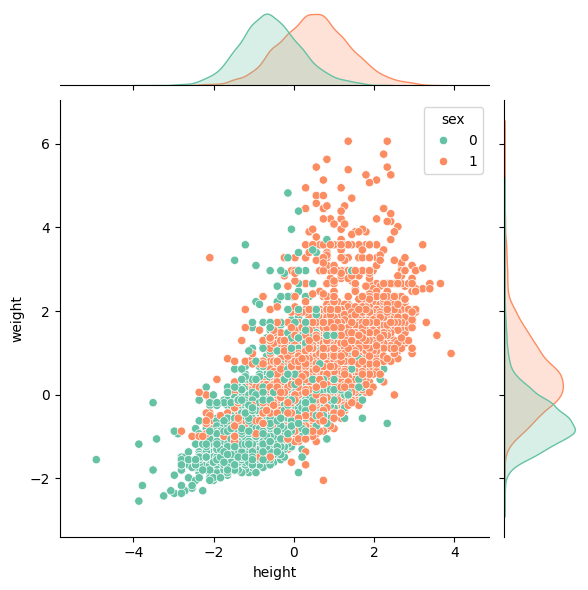

In [629]:
sns.jointplot(data=data_plt, x='height', y='weight', palette='Set2', hue='sex')
plt.show()

In [ ]:
# ну как-то так)
# слава богу, что женщины продолжают оставаться женственными

In [ ]:
# ради интереча более подробно рассмотрим эту упрощенную модель

In [630]:
X = data_h_w

In [631]:
X.head()

,height,weight
0,1.72,64.0
1,1.68,56.0
2,1.98,79.0
3,1.83,80.0
4,1.81,71.0


In [632]:
Y = data_copy['sex']

In [633]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: sex, dtype: int64

In [ ]:
# https://miptstats.github.io/courses/ad_mipt/logreg.html

In [634]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [635]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# выведем коэффициенты модели:

In [636]:
clf.coef_

array([[6.18037113, 0.07785864]])

In [ ]:
# выведем коэффициент перед свободным параметром

In [637]:
clf.intercept_

array([-16.18068045])

In [ ]:
# график предсказаний вероятности принадлежности классу

In [638]:
x0_grid, x1_grid = np.meshgrid(np.linspace(1, 2.4, 2001), 
                               np.linspace(0, 200, 2001))
ravel_grid = np.array([x0_grid, x1_grid]).reshape((2, 2001*2001)).T
prob_grid = clf.predict_proba(ravel_grid)
prob_grid = prob_grid[:, 0].reshape((2001, 2001))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


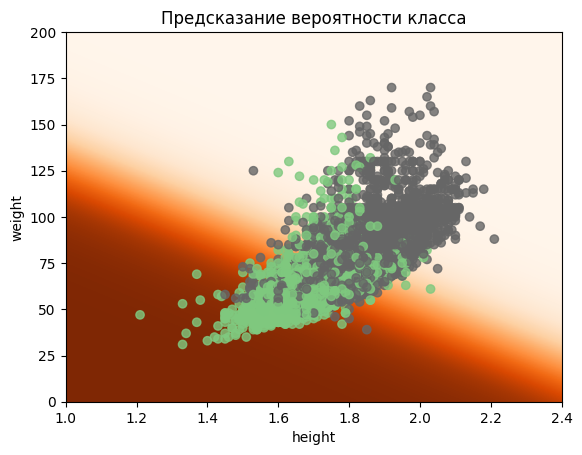

In [639]:
plt.pcolormesh(x0_grid, x1_grid, prob_grid, cmap='Oranges')
plt.scatter(X['height'], X['weight'], c=Y, alpha=0.8, cmap='Accent')
plt.xlim((1, 2.4))
plt.ylim((0, 200))
plt.xlabel('height'), plt.ylabel('weight')
plt.title('Предсказание вероятности класса');

In [ ]:
# или данные по весам не совсем верные
# или что-то я напутал
# искать ошибку уже некогда
# но зато было интересно разбираться)

In [ ]:
# продалжым основную тему занятия

In [ ]:
# преобразуем значание sport

In [640]:
data_copy = pd.get_dummies(data=data_copy, columns=['sport'])

In [641]:
data_copy

,sex,height,weight,gold,silver,bronze,sport_aquatics,sport_archery,sport_athletics,sport_badminton,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1,-0.415029,-0.499388,0,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,-0.768680,-0.994388,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1.883697,0.428737,0,0,1,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0.557509,0.490612,0,0,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,1,0.380684,-0.066263,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10853,0,-1.122330,-0.870638,0,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
10854,0,-0.326617,-0.561263,0,0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
10855,1,0.734334,1.728112,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10856,1,-1.475980,-0.994388,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# подготовим данные для обучения

In [642]:
X = data_copy.drop(columns=['sex'], axis=1)

In [643]:
X

,height,weight,gold,silver,bronze,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,-0.415029,-0.499388,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.768680,-0.994388,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.883697,0.428737,0,0,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.557509,0.490612,0,0,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0.380684,-0.066263,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10853,-1.122330,-0.870638,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10854,-0.326617,-0.561263,0,0,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10855,0.734334,1.728112,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10856,-1.475980,-0.994388,0,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [644]:
Y = data_copy['sex']

In [645]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: sex, dtype: int64

In [646]:
# для классификации используем логистическую регрессию
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [647]:
# поделим данные на обучающую выборку и тестовую 80 / 20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.80, random_state=42)

In [648]:
len(y_test)

8687

In [649]:
# обучим модель
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [650]:
# посмотрим, что получилось
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 80.56%


In [ ]:
# построим ROC-кривую

In [651]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

# модель у нас уже обучена

# получаем предказания
lr_probs = model.predict_proba(X_test)

In [313]:
len(lr_probs)

8687

In [326]:
# рассчитываем roc-кривую
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [652]:
fpr, tpr, treshold = roc_curve(y_test, lr_probs[:,1], drop_intermediate=False)

In [653]:
len(fpr)

6711

In [654]:
fpr, tpr, treshold = roc_curve(y_test, lr_probs[:,1])

In [655]:
len(fpr)

3279

In [ ]:
"""
Вот это действительно интересно
размер массивов уменьшается даже с использованием 
drop_intermediate=False

если не секрет подскажите, пожалуйста, почему так происходит?
"""

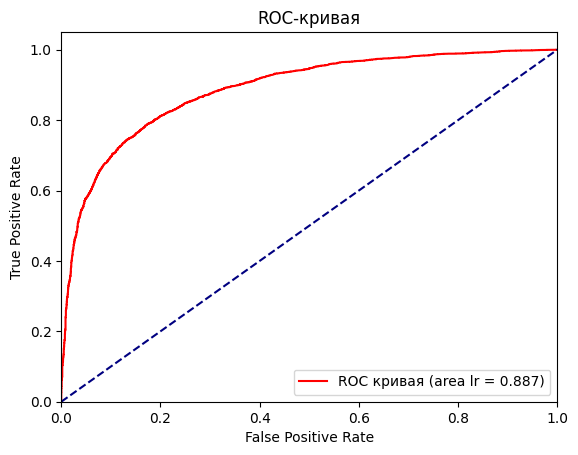

In [667]:
# строим график
plt.plot(fpr, tpr, color='red',
         label='ROC кривая (area lr = %.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [668]:
roc_auc = auc(fpr, tpr)
roc_auc

0.886652167302264

In [ ]:
# подсчет метрик TPR, FPR «вручную»

In [669]:
thresholds = np.arange(0, 1, 0.1)
fpr_1 = []
tpr_1 = []
prs_1 = []
rec_1 = []
for threshold in thresholds:
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    for predicted_prob, actual in zip(lr_probs[:, 1], y_test):
        if predicted_prob >= threshold:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    tpr_ = tp/(tp + fn)
    fpr_ = fp/(fp + tn)
    prs_ = tp/(tp + fp)
    rec_ = tpr_
    fpr_1.append(fpr_)
    tpr_1.append(tpr_)
    prs_1.append(prs_)
    rec_1.append(rec_)

In [670]:
# посмотрим на 1 из параметров
rec_1

[1.0,
 0.9879006580343876,
 0.9643387815750372,
 0.9248567183188283,
 0.8764593504563787,
 0.8197834854595627,
 0.7495223943960942,
 0.6590957333899384,
 0.5482912332838039,
 0.35661218424962854]

In [671]:
roc_auc_1 = auc(fpr_1, tpr_1)
roc_auc_1

0.881122918790604

In [672]:
# можно через метрику
print('Площадь, рассчитанная ручным способом: ', metrics.auc(fpr_1, tpr_1))

Площадь, рассчитанная ручным способом:  0.881122918790604


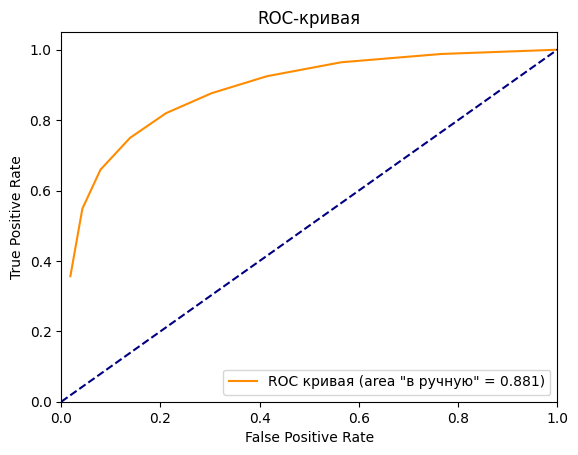

In [673]:
# строим график
plt.plot(fpr_1, tpr_1, color='darkorange',
         label='ROC кривая (area "в ручную" = %.3f)' % roc_auc_1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [473]:
# объединим графики

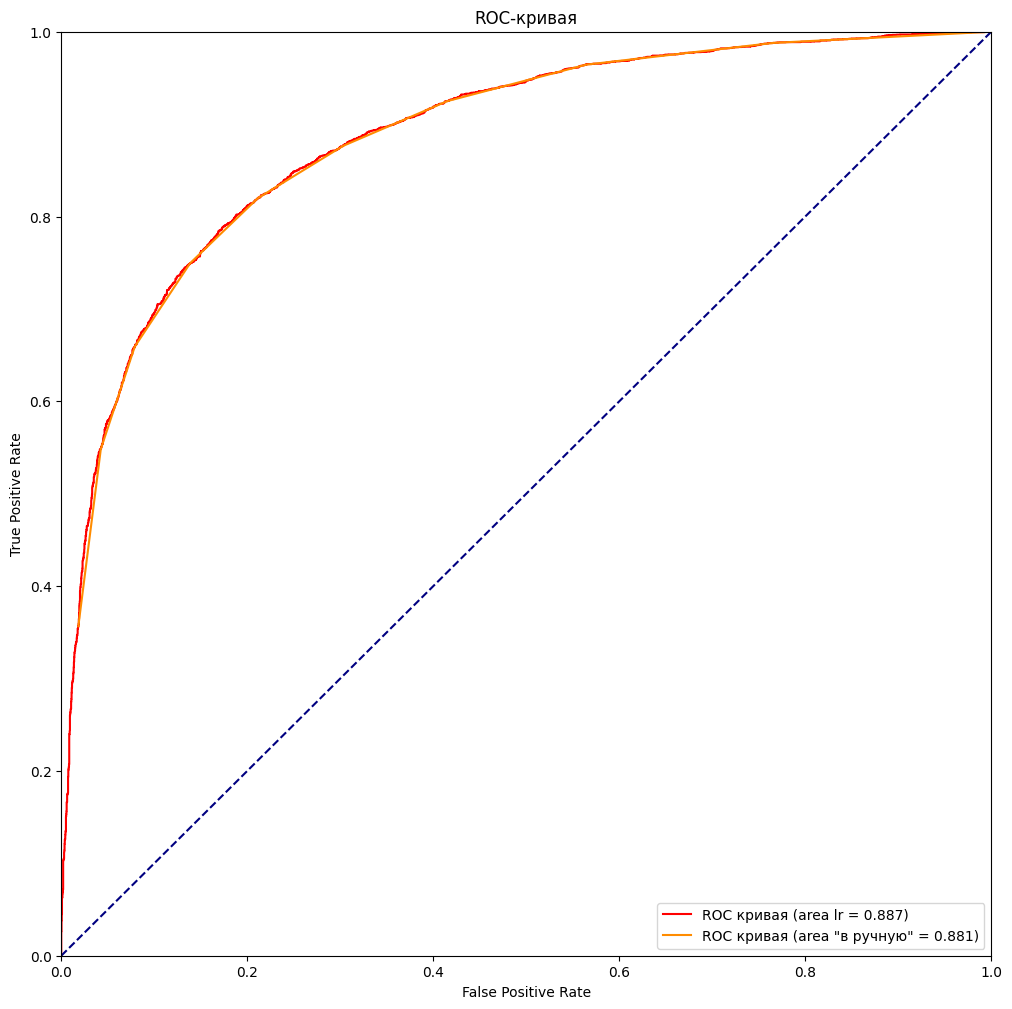

In [674]:
plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr, color='red',
         label='ROC кривая (area lr = %.3f)' % roc_auc)
plt.plot(fpr_1, tpr_1, color='darkorange',
         label='ROC кривая (area "в ручную" = %.3f)' % roc_auc_1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# построим график Precision-Recall

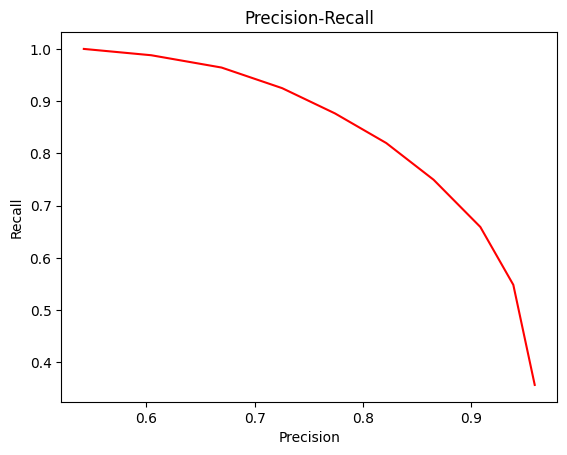

In [675]:
plt.plot(prs_1, rec_1, color="red")
plt.title('Precision-Recall')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

In [676]:
print('Площадь, рассчитанная ручным способом: ', metrics.auc(fpr_1, tpr_1))

Площадь, рассчитанная ручным способом:  0.881122918790604
